In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
# my paper parameters:
plt.style.use('classic')
plt.style.use('presentation')
rcParams['mathtext.default'] = 'regular'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['font.size'] = 16

In [3]:
def plot_curvedness_histogram(
        data_frames, labels, palette, average_label=None, condition=None,
        binwidth=0.001, min_edge=0, max_edge=0.1, reverse_cum=True, log=False,
        png=None, linewidth=4, membrane=None):
    fig, ax = plt.subplots()

    binsnum = int((max_edge - min_edge) / binwidth)
    bins = np.linspace(min_edge, max_edge, binsnum + 1)
    for df, label in zip(data_frames, labels):
        if log:
            counts, bin_edges = np.histogram(
                np.log(df["curvedness"]), bins, weights=df["triangleAreas"])
        else:
            counts, bin_edges = np.histogram(
                df["curvedness"], bins, weights=df["triangleAreas"])
        # normalized to total surface area
        norm_counts = counts / sum(df["triangleAreas"])
        if reverse_cum:
            norm_counts = 1 - np.cumsum(norm_counts)
        bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        if average_label is not None:
            if label == average_label:
                plt.plot(bincenters, norm_counts, linewidth=linewidth,
                         label=label, color="black")
            else:
                plt.plot(bincenters, norm_counts, linewidth=linewidth,
                         label=label)
        else:
            plt.plot(bincenters, norm_counts, linewidth=linewidth,
                     label=label, color=palette[label], clip_on=False)

    plt.legend(loc='center right', fancybox=True, framealpha=0.5,
               fontsize=18, handletextpad=0.2, borderpad=0.2)  # without sns
    if condition is not None:
        l = plt.legend()
        l.set_title(condition)
    if log:
        plt.xlabel(r"log(curvedness) (nm$^{-1}$)")
    else:  # hard-coded cER/PM, because formatting did not work here
        if membrane == "cER":
            plt.xlabel(r"cER curvedness (nm$^{-1}$)")
        elif membrane == "PM":
            plt.xlabel(r"PM curvedness (nm$^{-1}$)")
        else:
            plt.xlabel(r"Curvedness (nm$^{-1}$)")
    if reverse_cum:
        plt.ylabel("Relative exceedance frequency")
    else:
        plt.ylabel("Relative frequency")
    plt.xlim(min_edge, max_edge)
    plt.xticks(np.arange(0.0, 0.101, 0.02), (0, 0.02, 0.04, 0.06, 0.08, 0.1))
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.tick_params(direction='in')
    if png is not None:
        plt.savefig(png, facecolor='w', transparent=False, bbox_inches='tight')
    plt.show()

## Load and save data

In [4]:
# cER TCB mutant from yeast tomogram (Fig 11)
fold = '../ER/AVV'
csv_file = os.path.join(fold, 'TCB_180830_l2_t2half.ER.AVV_rh10_excluding1borders.csv')
df = pd.read_csv(csv_file, sep=";", index_col=0)
df = df[df['curvedness'] <= 0.1]
df_cer_tcb = df
print("cER: {} values".format(len(df_cer_tcb)))

cER: 65466 values


In [5]:
# Golgi and vesicles from mouse neuron tomogram (Fig 12)
base_fold = "../Golgi_and_vesicles"
dfs = []
for organelle in ["Golgi", "Vesicles"]:
    fold = os.path.join(base_fold, organelle)
    csv_file = os.path.join(fold, f'l2_t6_{organelle}.AVV_rh10_excluding1borders.csv')
    df = pd.read_csv(csv_file, sep=";", index_col=0)
    df = df[df['curvedness'] <= 0.1]
    dfs.append(df)
(df_golgi, df_vesicles) = dfs
print("Golgi: {} values".format(len(df_golgi)))
print("Vesicles: {} values".format(len(df_vesicles)))

Golgi: 731542 values
Vesicles: 187194 values


## Plot histograms of curvedness for cER (one Tcb tomogram) vs. Golgi vs. vesicles

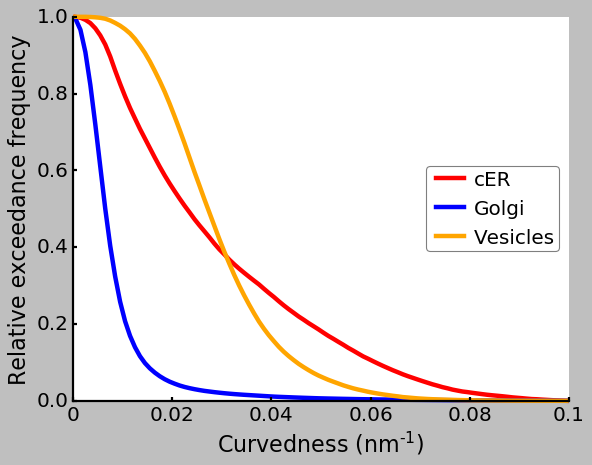

In [6]:
organelle_labels = ["cER", "Golgi", "Vesicles"]
my_pal = {"cER":"r", "Golgi":"b", "Vesicles":"orange"}
data_frames = [df_cer_tcb, df_golgi, df_vesicles]
plot_curvedness_histogram(
    data_frames, labels=organelle_labels, palette=my_pal, average_label=None, condition=None,
    binwidth=0.001, min_edge=0, max_edge=0.1, reverse_cum=True, log=False,
    png='curvedness_exeedance_cERtcb_Golgi_Vesicles.png')

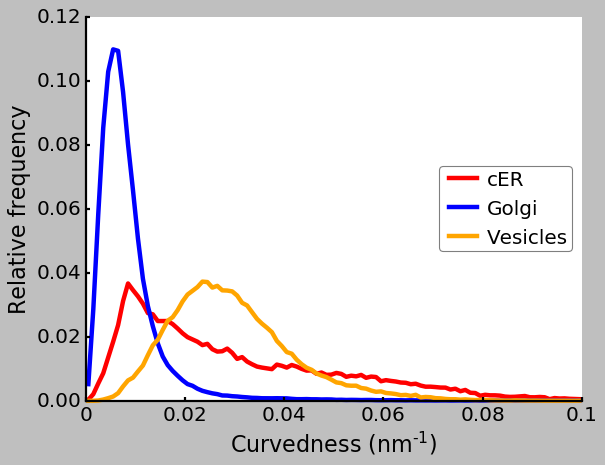

In [7]:
plot_curvedness_histogram(
    data_frames, labels=organelle_labels, palette=my_pal, average_label=None, condition=None,
    binwidth=0.001, min_edge=0, max_edge=0.1, reverse_cum=False, log=False,
    png='curvedness_hist_cERtcb_Golgi_Vesicles.png')